# Preamble 

Please use table of contents provided to navigate to the relevant sections for each set of hyper-parameter testing.

## Imports

In [ ]:
import numpy as np
import random as python_random

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from keras.utils import to_categorical

import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle


import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Set Random Seeds

In [ ]:
np.random.seed(123)

python_random.seed(123)

tf.random.set_seed(1234)

# Data

In [ ]:
labels = {
    0 : "airplane",
    1 : "automobile",
    2 : "bird",
    3 : "cat",
    4 : "deer",
    5 : "dog",
    6 : "frog",
    7 : "horse",
    8 : "ship",
    9 : "truck"
}

# Load data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


## Preprocessing

In [ ]:
# Normalize.
X_train, X_test = X_train.astype("float32")/255, X_test.astype("float32")/255

## One-Hot Encode

In [ ]:
# One-Hot encode.
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

# Train Test split - Stratify or Shuffle


In [ ]:
X_train, y_train = shuffle(X_train, y_train)

# from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
#                                                     test_size=0.2,
#                                                     random_state=0,
#                                                     stratify=y_train)

## Stand-alone functions

In [ ]:
def get_class(index):
  return labels[index]

def un_hot_decode_array(arr):
  on = np.where(arr == max(arr))[0]
  if len(on) > 1:
    raise IndexError("Probability Overflow")
  return on[0] # Index [0] to de-list.

def un_hot_decode_data(y):
  return np.apply_along_axis(un_hot_decode_array, 1, y)

## Demo

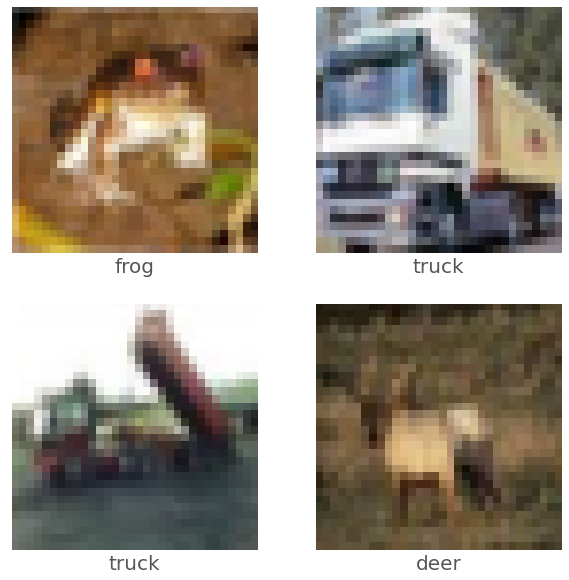

In [ ]:
def get_class_demo(index):
  return labels[list(y_train[index]).index(max(y_train[index]))]


plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(get_class_demo(i), size=20)
plt.show()

# Neural Network - Baselines

## Baseline 1

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=30, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/30
1250/1250 [==============================] - 5s 3ms/step - loss: 1.6512 - accuracy: 0.4042 - val_loss: 1.1972 - val_accuracy: 0.5768
Epoch 2/30
1250/1250 [==============================] - 4s 3ms/step - loss: 1.1082 - accuracy: 0.6137 - val_loss: 1.0348 - val_accuracy: 0.6389
Epoch 3/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9430 - accuracy: 0.6739 - val_loss: 0.9921 - val_accuracy: 0.6495
Epoch 4/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8318 - accuracy: 0.7169 - val_loss: 0.9577 - val_accuracy: 0.6722
Epoch 5/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7535 - accuracy: 0.7400 - val_loss: 0.9483 - val_accuracy: 0.6701
Epoch 6/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6804 - accuracy: 0.7610 - val_loss: 0.9620 - val_accuracy: 0.6768
Epoch 7/30
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6106 - accuracy: 0.7901 - val_loss: 0.9839 - val_accuracy:

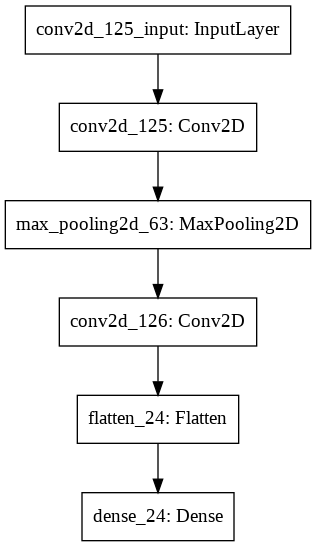

In [ ]:
tf.keras.utils.plot_model(model)

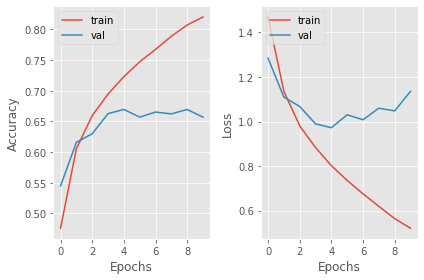

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

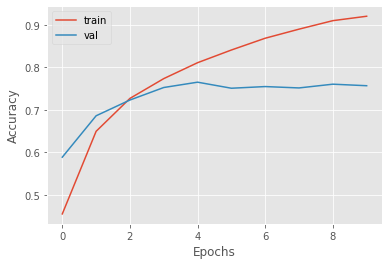

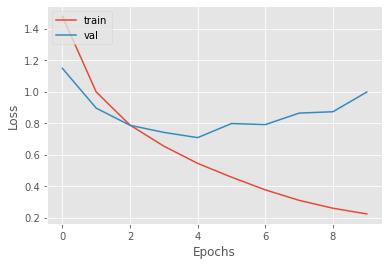

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.1591 - accuracy: 0.6489


[1.1590509414672852, 0.6488999724388123]

## Baseline 2


As this is a deeper network, we introduce padding on the convolutional layers. This helps prevent information at the image borders being lost by conversing shape. This is more relevant the deeper the network goes as volume size would descrease with depth. 


We also introduce early stopping. As seen in the previous baselines there is not much improvement past an early epoch, around the 8 to 10 mark. Early stopping with patience allows us to pause training if no improvement is seen after a given number of epochs.

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=3)
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

In [ ]:
def create_model():

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=20, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7899 - accuracy: 0.3389 - val_loss: 1.2529 - val_accuracy: 0.5473
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1708 - accuracy: 0.5839 - val_loss: 0.9670 - val_accuracy: 0.6582
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9006 - accuracy: 0.6820 - val_loss: 0.8703 - val_accuracy: 0.6923
Epoch 4/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7170 - accuracy: 0.7495 - val_loss: 0.7980 - val_accuracy: 0.7302
Epoch 5/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6078 - accuracy: 0.7895 - val_loss: 0.7756 - val_accuracy: 0.7383
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4987 - accuracy: 0.8257 - val_loss: 0.8175 - val_accuracy: 0.7422
Epoch 7/20
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4030 - accuracy: 0.8579 - val_loss: 0.8233 - val_accuracy:

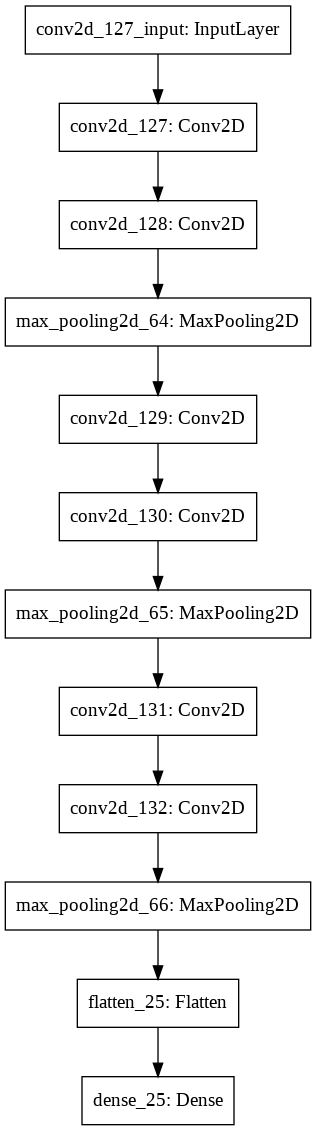

In [ ]:
tf.keras.utils.plot_model(model)

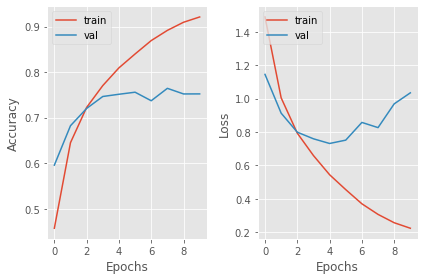

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

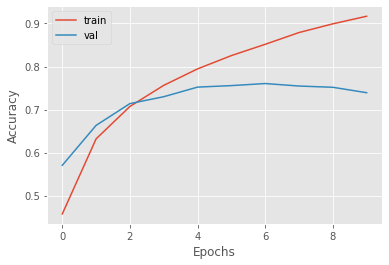

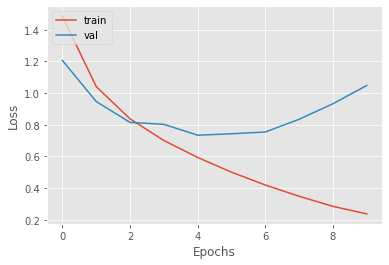

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1041 - accuracy: 0.7367


[1.1040946245193481, 0.7366999983787537]

# Batch Normalization - Baseline 1

* "The goal of Batch Normalization is to achieve a stable distribution of activation values throughout training, and in our experiments we apply it before the nonlinearity since that is where matching the first and second moments is more likely to result in a stable distribution"
  * https://arxiv.org/abs/1502.03167

They \[Ioffe and Szegedy\] suggest that a change in the distribution of activations because of parameter updates slows learning.  They call this change the internal covariate shift.

* Removing Dropout from Modified BN-Inception speeds up training, without increasing overfitting.
  * https://arxiv.org/abs/1502.03167

* The statistics used to normalize the activations of the prior layer may become noisy given the random dropping out of nodes during the dropout procedure.


In [ ]:
from keras.layers import BatchNormalization

## After the activation function

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", verbose=1, patience=3)
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
  model.add(BatchNormalization()) # After activation.
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization()) # After activation.

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/60
1250/1250 [==============================] - 5s 4ms/step - loss: 2.2990 - accuracy: 0.4195 - val_loss: 1.2687 - val_accuracy: 0.5621
Epoch 2/60
1250/1250 [==============================] - 4s 3ms/step - loss: 1.0486 - accuracy: 0.6387 - val_loss: 1.1778 - val_accuracy: 0.6185
Epoch 3/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.8214 - accuracy: 0.7172 - val_loss: 1.2204 - val_accuracy: 0.6054
Epoch 4/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6849 - accuracy: 0.7640 - val_loss: 1.2512 - val_accuracy: 0.6001
Epoch 5/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6129 - accuracy: 0.7888 - val_loss: 1.4687 - val_accuracy: 0.5666
Epoch 6/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5052 - accuracy: 0.8234 - val_loss: 1.3843 - val_accuracy: 0.6104
Epoch 7/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4301 - accuracy: 0.8524 - val_loss: 1.3944 - val_accuracy:

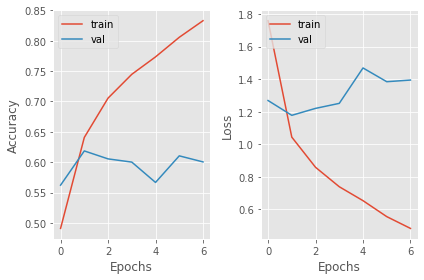

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4425 - accuracy: 0.5946


[1.4424957036972046, 0.5946000218391418]

## Before the activation function - as in original paper

### Batch Norm (before) - Test 1

In [ ]:
from keras.layers import Activation

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3)))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/60
1250/1250 [==============================] - 5s 4ms/step - loss: 1.8805 - accuracy: 0.4437 - val_loss: 1.8294 - val_accuracy: 0.4693
Epoch 2/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.9558 - accuracy: 0.6707 - val_loss: 1.0492 - val_accuracy: 0.6392
Epoch 3/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7867 - accuracy: 0.7288 - val_loss: 1.0167 - val_accuracy: 0.6548
Epoch 4/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6589 - accuracy: 0.7733 - val_loss: 0.9435 - val_accuracy: 0.6790
Epoch 5/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.5607 - accuracy: 0.8105 - val_loss: 1.2988 - val_accuracy: 0.6007
Epoch 6/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4613 - accuracy: 0.8424 - val_loss: 1.1098 - val_accuracy: 0.6657
Epoch 7/60
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3821 - accuracy: 0.8682 - val_loss: 1.2915 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.2132 - accuracy: 0.6535


[1.2132432460784912, 0.6535000205039978]

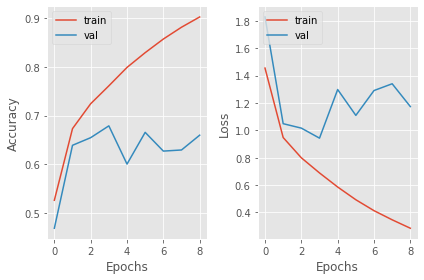

In [ ]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')

# ax1.set_ylim(0,1)

ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
# ax1.set_ylim(0,1)
f.tight_layout()

plt.show()

### Batch Norm (before) - With varying batch sizes

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3)))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
batch_sizes = [2**num for num in range(3, 10)]

In [ ]:
from tqdm import tqdm

history_list = []

for batch_size in tqdm(batch_sizes):
 
  model = create_model()

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, verbose=0, batch_size=batch_size, callbacks=[callback])
  
  history_list.append(history)

 14%|█▍        | 1/7 [01:55<11:32, 115.35s/it]

Epoch 00011: early stopping


 29%|██▊       | 2/7 [03:11<08:37, 103.51s/it]

Epoch 00014: early stopping


 43%|████▎     | 3/7 [03:50<05:37, 84.35s/it] 

Epoch 00013: early stopping


 57%|█████▋    | 4/7 [04:10<03:14, 64.95s/it]

Epoch 00012: early stopping


 71%|███████▏  | 5/7 [04:26<01:40, 50.17s/it]

Epoch 00012: early stopping


 86%|████████▌ | 6/7 [04:44<00:40, 40.55s/it]

Epoch 00017: early stopping


100%|██████████| 7/7 [05:03<00:00, 43.39s/it]

Epoch 00020: early stopping


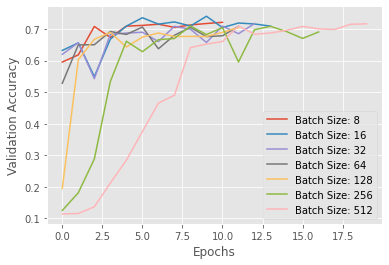

In [ ]:
for his in history_list:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")
plt.legend(["Batch Size: {}".format(b) for b in batch_sizes], loc="lower right")
plt.show()

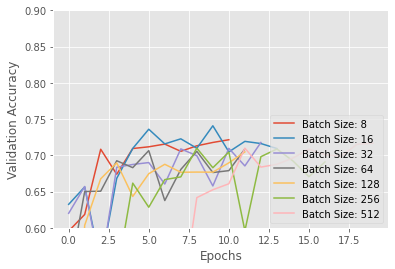

In [ ]:
for his in history_list:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylim(0.6,0.9)
plt.legend(["Batch Size: {}".format(b) for b in batch_sizes], loc="lower right")
plt.show()

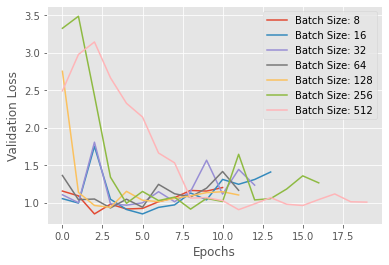

In [ ]:
for his in history_list:
  plt.plot(his.history["val_loss"])
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")
plt.legend(["Batch Size: {}".format(b) for b in batch_sizes], loc="upper right")
plt.show()

# Batch Normalization - Baseline 2

In [ ]:
from keras.layers import BatchNormalization

## After the activation function

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization()) # After activation.
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization()) # After activation.
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same"))
  model.add(BatchNormalization()) # After activation.
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history_after = model.fit(X_train, y_train, epochs=60, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7593 - accuracy: 0.4266 - val_loss: 2.0729 - val_accuracy: 0.4577
Epoch 2/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9774 - accuracy: 0.6647 - val_loss: 1.0005 - val_accuracy: 0.6689
Epoch 3/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7357 - accuracy: 0.7490 - val_loss: 0.9494 - val_accuracy: 0.6899
Epoch 4/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5784 - accuracy: 0.8009 - val_loss: 0.9069 - val_accuracy: 0.7082
Epoch 5/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4685 - accuracy: 0.8370 - val_loss: 0.9029 - val_accuracy: 0.6988
Epoch 6/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.3663 - accuracy: 0.8714 - val_loss: 0.7892 - val_accuracy: 0.7584
Epoch 7/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2684 - accuracy: 0.9072 - val_loss: 0.8118 - val_accuracy:

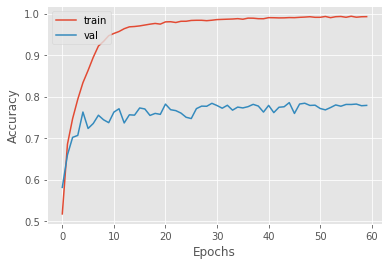

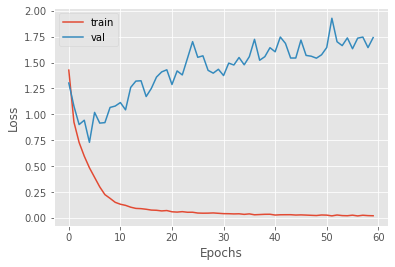

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.8009 - accuracy: 0.7749


[1.8009369373321533, 0.7749000191688538]

## Before the activation function - as in original paper

### Batch Norm (before) - Test 1

In [ ]:
from keras.layers import Activation

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=8)

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), padding="same"))
  model.add(layers.Conv2D(64, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), padding="same"))
  model.add(layers.Conv2D(128, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history_before = model.fit(X_train, y_train, epochs=60, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6599 - accuracy: 0.4298 - val_loss: 1.2227 - val_accuracy: 0.5836
Epoch 2/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9518 - accuracy: 0.6723 - val_loss: 0.9188 - val_accuracy: 0.6797
Epoch 3/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.7709 - accuracy: 0.7311 - val_loss: 0.8972 - val_accuracy: 0.6931
Epoch 4/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.6523 - accuracy: 0.7720 - val_loss: 0.8524 - val_accuracy: 0.7153
Epoch 5/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5752 - accuracy: 0.8033 - val_loss: 1.0383 - val_accuracy: 0.6923
Epoch 6/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.5033 - accuracy: 0.8263 - val_loss: 0.7500 - val_accuracy: 0.7496
Epoch 7/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.4401 - accuracy: 0.8474 - val_loss: 0.7222 - val_accuracy:

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8079 - accuracy: 0.7926


[0.8078874945640564, 0.7925999760627747]

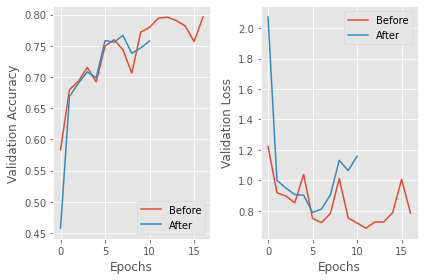

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history_before.history["val_accuracy"])
ax1.plot(history_after.history["val_accuracy"])
ax1.set_ylabel("Validation Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['Before', 'After'], loc='lower right')


ax2.plot(history_before.history["val_loss"])
ax2.plot(history_after.history["val_loss"])
ax2.set_ylabel("Validation Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['Before', 'After'], loc='upper right')
f.tight_layout()

plt.show()

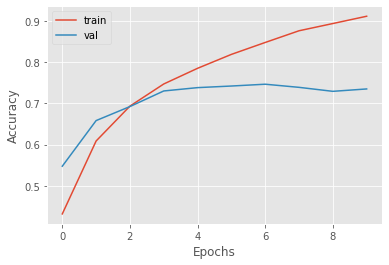

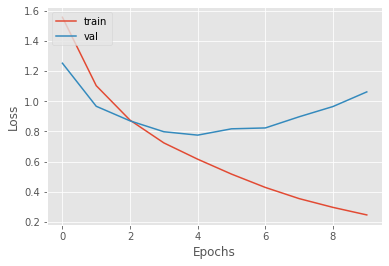

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

### Batch Norm (before) - With varying batch sizes

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), padding="same"))
  model.add(layers.Conv2D(64, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), padding="same"))
  model.add(layers.Conv2D(128, (3, 3), padding="same"))
  model.add(BatchNormalization()) # Before activation.
  model.add(Activation("relu"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
batch_sizes = [2**num for num in range(3, 10)]

In [ ]:
from tqdm import tqdm

history_list = []

for batch_size in tqdm(batch_sizes):
 
  model = create_model()

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, verbose=0, batch_size=batch_size, callbacks=[callback])
  
  history_list.append(history)

 14%|█▍        | 1/7 [04:44<28:27, 284.54s/it]

Epoch 00016: early stopping


 29%|██▊       | 2/7 [07:01<20:00, 240.14s/it]

Epoch 00015: early stopping


 43%|████▎     | 3/7 [08:31<13:01, 195.32s/it]

Epoch 00018: early stopping


 57%|█████▋    | 4/7 [09:32<07:44, 154.79s/it]

Epoch 00019: early stopping


 71%|███████▏  | 5/7 [10:17<04:03, 121.88s/it]

Epoch 00017: early stopping


 86%|████████▌ | 6/7 [10:53<01:36, 96.34s/it] 

Epoch 00016: early stopping


100%|██████████| 7/7 [11:42<00:00, 100.37s/it]

Epoch 00023: early stopping


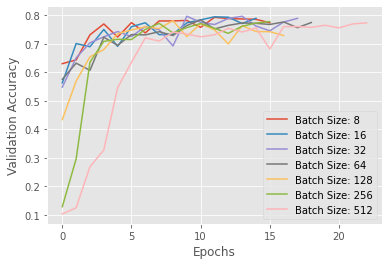

In [ ]:
for his in history_list:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")
plt.legend(["Batch Size: {}".format(b) for b in batch_sizes], loc="lower right")
plt.show()

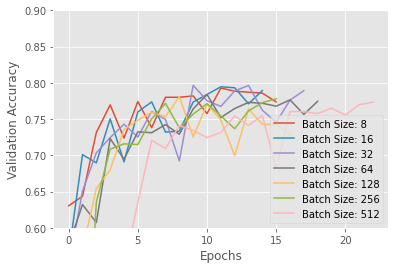

In [ ]:
for his in history_list:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylim(0.6,0.9)
plt.legend(["Batch Size: {}".format(b) for b in batch_sizes], loc="lower right")
plt.show()

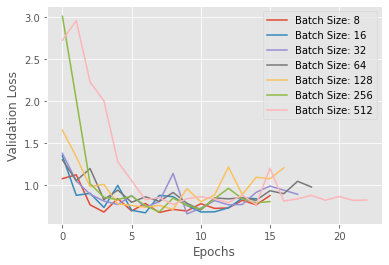

In [ ]:
for his in history_list:
  plt.plot(his.history["val_loss"])
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")
plt.legend(["Batch Size: {}".format(b) for b in batch_sizes], loc="upper right")
plt.show()

# Weight Initialization - No batch + callback

In [ ]:
# Glorot uniform is default for dense + conv layers.
kernel_initializers = ["zeros", "he_uniform", "he_normal", "glorot_uniform", "glorot_normal", "random_normal", "random_uniform"]

In [ ]:
def create_model(kern_init):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=kern_init, input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=8)

In [ ]:
history_list = []

for kern_init in kernel_initializers:

  model = create_model(kern_init)

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, callbacks=[callback])

  history_list.append(history)

Epoch 1/60
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3027 - accuracy: 0.0974 - val_loss: 2.3028 - val_accuracy: 0.0969
Epoch 2/60
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3030 - val_accuracy: 0.0969
Epoch 3/60
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3030 - val_accuracy: 0.0969
Epoch 4/60
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.1008 - val_loss: 2.3029 - val_accuracy: 0.0991
Epoch 5/60
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3027 - accuracy: 0.1000 - val_loss: 2.3030 - val_accuracy: 0.0989
Epoch 6/60
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3028 - accuracy: 0.0943 - val_loss: 2.3031 - val_accuracy: 0.0974
Epoch 7/60
1000/1000 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.1003 - val_loss: 2.3030 - val_accuracy:

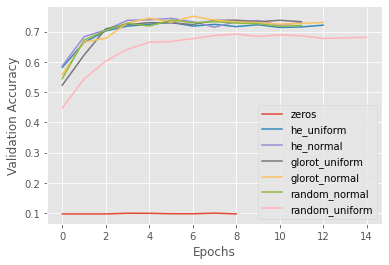

In [ ]:
for his in history_list:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")  
plt.legend(kernel_initializers)
plt.show()

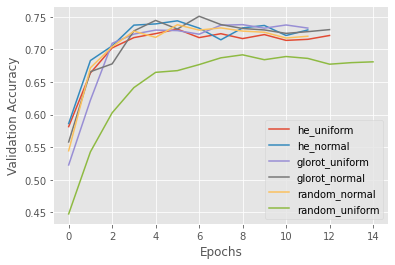

In [ ]:
for his in history_list[1:]:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")  
plt.legend(kernel_initializers[1:])
plt.show()

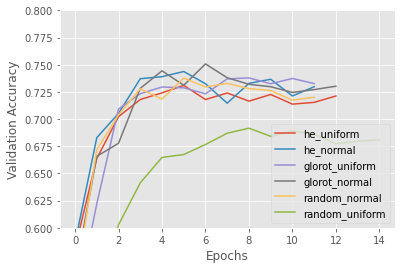

In [ ]:
for his in history_list[1:]:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.ylim(0.6,0.8)
plt.xlabel("Epochs")  
plt.legend(kernel_initializers[1:])
plt.show()

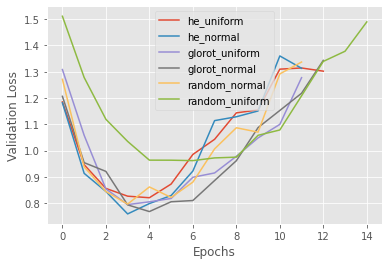

In [ ]:
for his in history_list[1:]:
  plt.plot(his.history["val_loss"])
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")  
plt.legend(kernel_initializers[1:])
plt.show()

In [ ]:
[his.history["val_accuracy"][-1] for his in history_list]

[0.09687499701976776,
 0.7212499976158142,
 0.7297499775886536,
 0.7326250076293945,
 0.7302500009536743,
 0.7201250195503235,
 0.6808750033378601]

#### Result: he_uniform

As expected, initializing with zeros performs worst. He uniform performs best.

# Weight Initialization 

In [ ]:
# Glorot uniform is default for dense + conv layers.
kernel_initializers = ["zeros", "he_uniform", "he_normal", "glorot_uniform", "glorot_normal", "random_normal", "random_uniform"]

In [ ]:
def create_model(kern_init):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=kern_init, input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer=kern_init))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=8)

In [ ]:
import tqdm

In [ ]:
history_list = []

for kern_init in tqdm.tqdm(kernel_initializers):

  model = create_model(kern_init)

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, batch_size=256, verbose=0)

  history_list.append(history)

100%|██████████| 7/7 [10:25<00:00, 89.30s/it]


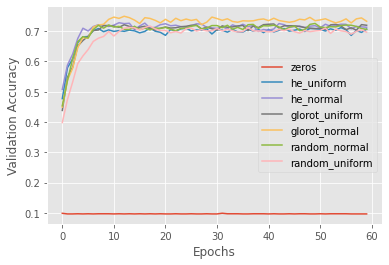

In [ ]:
for his in history_list:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")  
plt.legend(kernel_initializers)
plt.show()

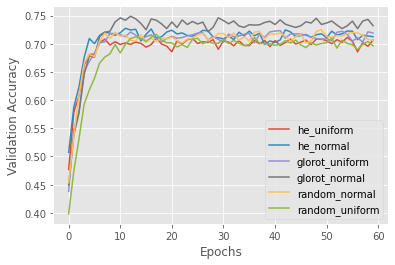

In [ ]:
for his in history_list[1:]:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")  
plt.legend(kernel_initializers[1:])
plt.show()

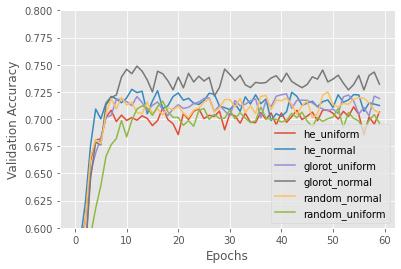

In [ ]:
for his in history_list[1:]:
  plt.plot(his.history["val_accuracy"])
plt.ylabel("Validation Accuracy")
plt.ylim(0.6,0.8)
plt.xlabel("Epochs")  
plt.legend(kernel_initializers[1:])
plt.show()

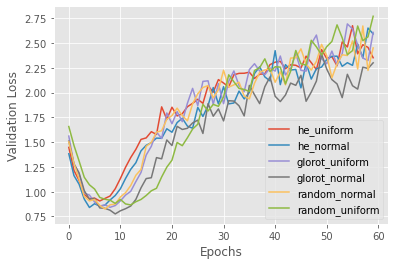

In [ ]:
for his in history_list[1:]:
  plt.plot(his.history["val_loss"])
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")  
plt.legend(kernel_initializers[1:])
plt.show()

In [ ]:
[his.history["val_accuracy"][-1] for his in history_list]

[0.09687499701976776,
 0.706375002861023,
 0.7124999761581421,
 0.718999981880188,
 0.7321249842643738,
 0.7055000066757202,
 0.6962500214576721]

#### Result: he_uniform

As expected, initializing with zeros performs worst. He uniform performs best.

* https://stepup.ai/train_data_augmentation_keras/

* https://www.kaggle.com/saife245/cutmix-vs-mixup-vs-gridmask-vs-cutout


# Introduce Regularization to prevent overfitting 

## Dropout

* https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf

* https://arxiv.org/pdf/1207.0580.pdf


### Dropout - Test 1 
Low drop out rate:

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=3)
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.2))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/20
157/157 [==============================] - 3s 16ms/step - loss: 2.4349 - accuracy: 0.1865 - val_loss: 1.6534 - val_accuracy: 0.3898
Epoch 2/20
157/157 [==============================] - 2s 15ms/step - loss: 1.5778 - accuracy: 0.4211 - val_loss: 1.4362 - val_accuracy: 0.4836
Epoch 3/20
157/157 [==============================] - 2s 15ms/step - loss: 1.3637 - accuracy: 0.5069 - val_loss: 1.2523 - val_accuracy: 0.5474
Epoch 4/20
157/157 [==============================] - 2s 15ms/step - loss: 1.1967 - accuracy: 0.5705 - val_loss: 1.2422 - val_accuracy: 0.5721
Epoch 5/20
157/157 [==============================] - 2s 15ms/step - loss: 1.0785 - accuracy: 0.6209 - val_loss: 1.0084 - val_accuracy: 0.6517
Epoch 6/20
157/157 [==============================] - 2s 15ms/step - loss: 0.9594 - accuracy: 0.6628 - val_loss: 0.9213 - val_accuracy: 0.6797
Epoch 7/20
157/157 [==============================] - 2s 15ms/step - loss: 0.8655 - accuracy: 0.6938 - val_loss: 0.7922 - val_accuracy: 0.7239

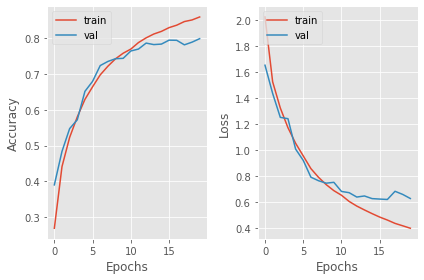

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

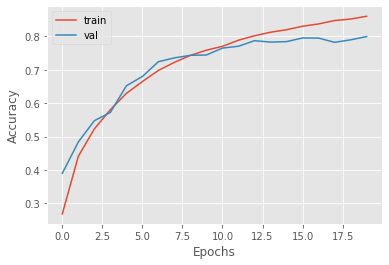

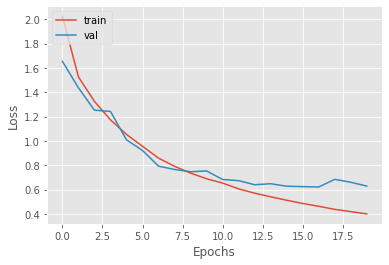

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6587 - accuracy: 0.7926


[0.6586562991142273, 0.7925999760627747]

### Dropout - Test 2
Increased dropout rate.

In [ ]:
def create_model():  

  dropout_rate = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=20, batch_size=256, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/20
157/157 [==============================] - 3s 16ms/step - loss: 2.3143 - accuracy: 0.1648 - val_loss: 1.6183 - val_accuracy: 0.4085
Epoch 2/20
157/157 [==============================] - 2s 15ms/step - loss: 1.6044 - accuracy: 0.4083 - val_loss: 1.3937 - val_accuracy: 0.4901
Epoch 3/20
157/157 [==============================] - 2s 15ms/step - loss: 1.4351 - accuracy: 0.4749 - val_loss: 1.2972 - val_accuracy: 0.5382
Epoch 4/20
157/157 [==============================] - 2s 15ms/step - loss: 1.3099 - accuracy: 0.5286 - val_loss: 1.1950 - val_accuracy: 0.5775
Epoch 5/20
157/157 [==============================] - 2s 15ms/step - loss: 1.2290 - accuracy: 0.5584 - val_loss: 1.0834 - val_accuracy: 0.6125
Epoch 6/20
157/157 [==============================] - 2s 15ms/step - loss: 1.1468 - accuracy: 0.5882 - val_loss: 1.0900 - val_accuracy: 0.6171
Epoch 7/20
157/157 [==============================] - 2s 15ms/step - loss: 1.0775 - accuracy: 0.6178 - val_loss: 0.9759 - val_accuracy: 0.6563

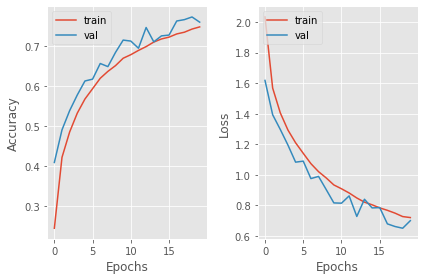

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

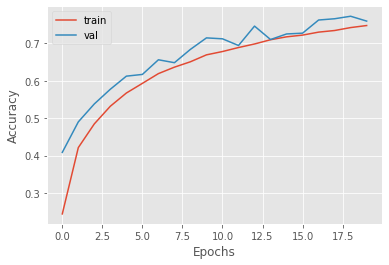

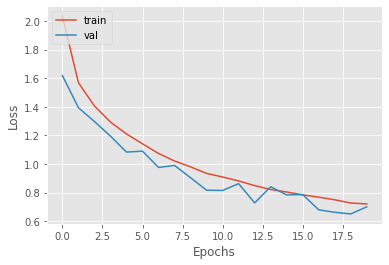

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7068 - accuracy: 0.7554


[0.7068045139312744, 0.7554000020027161]

### Dropout - Test 2 - increased epochs
Increased dropout rate.

In [ ]:
def create_model():  

  dropout_rate = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/50
157/157 [==============================] - 3s 16ms/step - loss: 2.5611 - accuracy: 0.1461 - val_loss: 1.7659 - val_accuracy: 0.3413
Epoch 2/50
157/157 [==============================] - 2s 15ms/step - loss: 1.6963 - accuracy: 0.3655 - val_loss: 1.4951 - val_accuracy: 0.4474
Epoch 3/50
157/157 [==============================] - 2s 15ms/step - loss: 1.5199 - accuracy: 0.4434 - val_loss: 1.4038 - val_accuracy: 0.4929
Epoch 4/50
157/157 [==============================] - 2s 15ms/step - loss: 1.3970 - accuracy: 0.4926 - val_loss: 1.4085 - val_accuracy: 0.4922
Epoch 5/50
157/157 [==============================] - 2s 15ms/step - loss: 1.3041 - accuracy: 0.5258 - val_loss: 1.3163 - val_accuracy: 0.5298
Epoch 6/50
157/157 [==============================] - 2s 15ms/step - loss: 1.1945 - accuracy: 0.5683 - val_loss: 1.1256 - val_accuracy: 0.6037
Epoch 7/50
157/157 [==============================] - 2s 15ms/step - loss: 1.1315 - accuracy: 0.5950 - val_loss: 1.0157 - val_accuracy: 0.6402

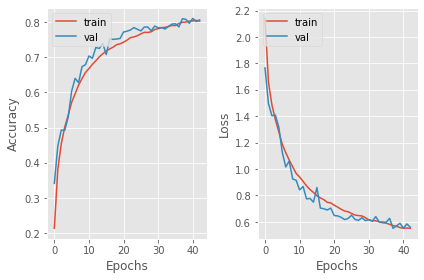

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

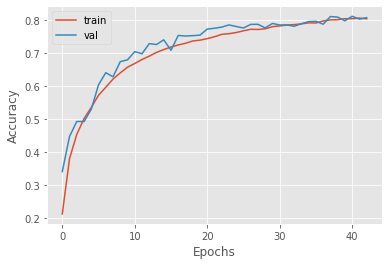

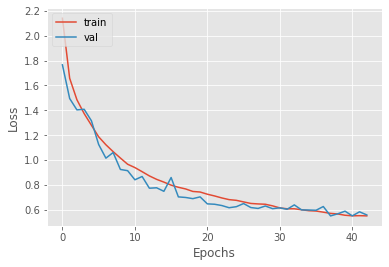

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5719 - accuracy: 0.8033


[0.571887195110321, 0.8033000230789185]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=8)

In [ ]:
def create_model():  

  dropout_rate = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(dropout_rate))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=60, batch_size=256, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/60
157/157 [==============================] - 3s 16ms/step - loss: 2.8313 - accuracy: 0.1247 - val_loss: 1.8783 - val_accuracy: 0.3372
Epoch 2/60
157/157 [==============================] - 2s 15ms/step - loss: 1.8125 - accuracy: 0.3241 - val_loss: 1.5578 - val_accuracy: 0.4312
Epoch 3/60
157/157 [==============================] - 2s 15ms/step - loss: 1.5919 - accuracy: 0.4119 - val_loss: 1.4981 - val_accuracy: 0.4559
Epoch 4/60
157/157 [==============================] - 2s 15ms/step - loss: 1.4585 - accuracy: 0.4647 - val_loss: 1.4874 - val_accuracy: 0.4779
Epoch 5/60
157/157 [==============================] - 2s 15ms/step - loss: 1.3755 - accuracy: 0.4998 - val_loss: 1.2799 - val_accuracy: 0.5441
Epoch 6/60
157/157 [==============================] - 2s 15ms/step - loss: 1.2636 - accuracy: 0.5449 - val_loss: 1.1566 - val_accuracy: 0.5897
Epoch 7/60
157/157 [==============================] - 2s 15ms/step - loss: 1.1909 - accuracy: 0.5695 - val_loss: 1.0708 - val_accuracy: 0.6121

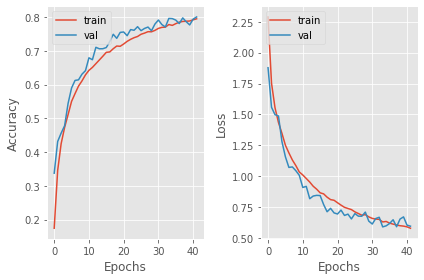

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

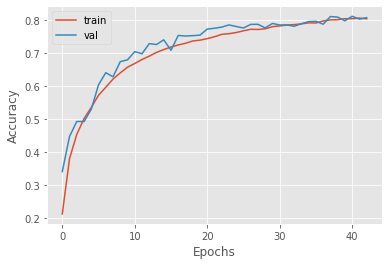

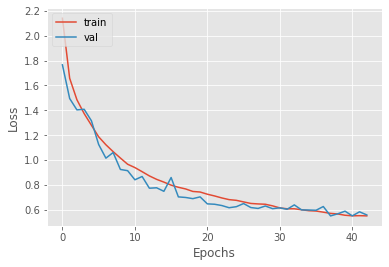

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5719 - accuracy: 0.8033


[0.571887195110321, 0.8033000230789185]

### Dropout - Test 3
Increased dropout rates, scaled per VGG block

In [ ]:
def create_model():  

  initial_dropout = 0.2
  hidden_dropout_1 = 0.3
  hidden_dropout_2 = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(initial_dropout))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_1))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_2))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/50
157/157 [==============================] - 3s 17ms/step - loss: 2.3441 - accuracy: 0.1646 - val_loss: 1.6158 - val_accuracy: 0.4163
Epoch 2/50
157/157 [==============================] - 2s 15ms/step - loss: 1.5885 - accuracy: 0.4136 - val_loss: 1.3853 - val_accuracy: 0.4991
Epoch 3/50
157/157 [==============================] - 2s 15ms/step - loss: 1.3635 - accuracy: 0.5037 - val_loss: 1.1811 - val_accuracy: 0.5846
Epoch 4/50
157/157 [==============================] - 2s 15ms/step - loss: 1.2116 - accuracy: 0.5689 - val_loss: 1.1578 - val_accuracy: 0.5948
Epoch 5/50
157/157 [==============================] - 2s 15ms/step - loss: 1.1138 - accuracy: 0.6011 - val_loss: 0.9666 - val_accuracy: 0.6575
Epoch 6/50
157/157 [==============================] - 2s 15ms/step - loss: 1.0101 - accuracy: 0.6408 - val_loss: 0.9098 - val_accuracy: 0.6840
Epoch 7/50
157/157 [==============================] - 2s 15ms/step - loss: 0.9362 - accuracy: 0.6680 - val_loss: 0.8222 - val_accuracy: 0.7090

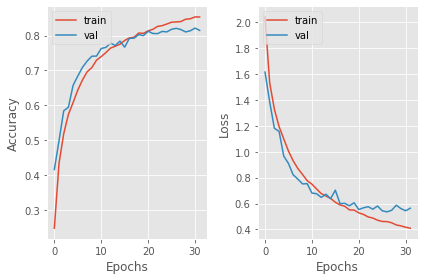

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

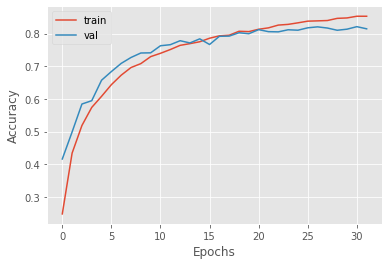

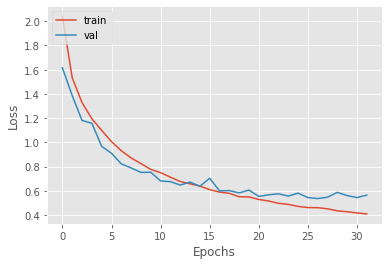

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5890 - accuracy: 0.8103


[0.5890458226203918, 0.8102999925613403]

### Dropout - Test 3 - with weight decay
Increased dropout rates, scaled per VGG block

In [304]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

In [305]:
def create_model():  

  initial_dropout = 0.2
  hidden_dropout_1 = 0.3
  hidden_dropout_2 = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(initial_dropout))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_1))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_2))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [306]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.20, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/50
157/157 [==============================] - 3s 13ms/step - loss: 2.2684 - accuracy: 0.1985 - val_loss: 1.6968 - val_accuracy: 0.4194
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 1.5881 - accuracy: 0.4467 - val_loss: 1.3538 - val_accuracy: 0.5404
Epoch 3/50
157/157 [==============================] - 2s 11ms/step - loss: 1.3648 - accuracy: 0.5314 - val_loss: 1.1935 - val_accuracy: 0.6032
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 1.2167 - accuracy: 0.5922 - val_loss: 1.1244 - val_accuracy: 0.6298
Epoch 5/50
157/157 [==============================] - 2s 11ms/step - loss: 1.1359 - accuracy: 0.6261 - val_loss: 0.9950 - val_accuracy: 0.6744
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 1.0300 - accuracy: 0.6614 - val_loss: 0.9455 - val_accuracy: 0.6953
Epoch 7/50
157/157 [==============================] - 2s 11ms/step - loss: 0.9570 - accuracy: 0.6870 - val_loss: 0.8578 - val_accuracy: 0.7280

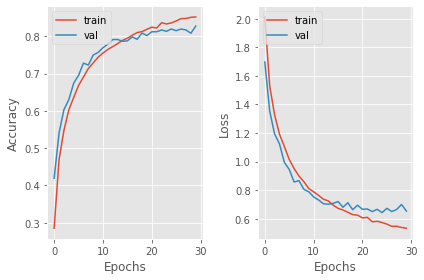

In [307]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

In [308]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6619 - accuracy: 0.8217


[0.6619099378585815, 0.8216999769210815]

## Weight Decay


Low weight decay amount is important for the model to learn by reducing the model's training error as well as acting as regularizer - http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks

In [ ]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [ ]:
weight_vals = [1e-2, 1e-3, 1e-4, 1e-5]

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

def create_model(weight_decay):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(weight_decay), input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(weight_decay)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(weight_decay)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l2(weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
#@title l2

train_list_l2 = []
test_list_l2 = []

history_l2 = []

for weight in tqdm(weight_vals):

  model = create_model(weight)

  model.compile(
      optimizer="adam",
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, verbose=0, batch_size=256, callbacks=[callback])

  history_l2.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_l2.append(train_acc)
  test_list_l2.append(test_acc)


 25%|██▌       | 1/4 [01:58<05:55, 118.56s/it]

Epoch 00017: early stopping



 50%|█████     | 2/4 [02:36<03:08, 94.33s/it] 

Epoch 00012: early stopping



 75%|███████▌  | 3/4 [03:04<01:14, 74.62s/it]

Epoch 00011: early stopping



100%|██████████| 4/4 [03:31<00:00, 52.89s/it]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

def create_model(weight_decay):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1(weight_decay), input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1(weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1(weight_decay)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1(weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1(weight_decay)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1(weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
#@title l1

train_list_l1 = []
test_list_l1 = []

history_l1 = []

for weight in tqdm(weight_vals):

  model = create_model(weight)

  model.compile(
      optimizer="adam",
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, callbacks=[callback], verbose=0, batch_size=256)

  history_l1.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_l1.append(train_acc)
  test_list_l1.append(test_acc)


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 00009: early stopping



 50%|█████     | 2/4 [02:21<01:43, 51.61s/it]

Epoch 00018: early stopping



 75%|███████▌  | 3/4 [03:01<00:48, 48.10s/it]

Epoch 00012: early stopping



100%|██████████| 4/4 [03:30<00:00, 52.70s/it]


In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=5)

def create_model(weight_decay):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1_l2(weight_decay,weight_decay), input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1_l2(weight_decay,weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1_l2(weight_decay,weight_decay)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1_l2(weight_decay,weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1_l2(weight_decay,weight_decay)))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", kernel_regularizer=l1_l2(weight_decay,weight_decay)))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
#@title l1_l2

train_list_l1_l2 = []
test_list_l1_l2 = []

history_l1_l2 = []

for weight in tqdm(weight_vals):

  model = create_model(weight)

  model.compile(
      optimizer="adam",
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, callbacks=[callback], verbose=0, batch_size=256)

  history_l1_l2.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_l1_l2.append(train_acc)
  test_list_l1_l2.append(test_acc)


  0%|          | 0/4 [00:00<?, ?it/s]

Epoch 00011: early stopping



 25%|██▌       | 1/4 [00:27<01:22, 27.44s/it]

Epoch 00060: early stopping



 50%|█████     | 2/4 [02:28<01:51, 55.64s/it]

Epoch 00018: early stopping



 75%|███████▌  | 3/4 [03:09<00:51, 51.13s/it]

Epoch 00012: early stopping



100%|██████████| 4/4 [03:38<00:00, 54.65s/it]


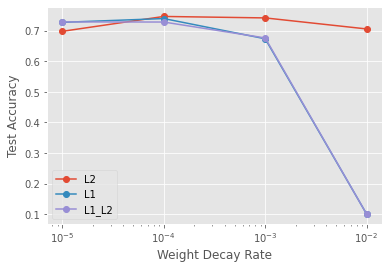

In [ ]:
plt.semilogx(weight_vals, test_list_l2, label='L2', marker='o')
plt.semilogx(weight_vals, test_list_l1, label='L1', marker='o')
plt.semilogx(weight_vals, test_list_l1_l2, label='L1_L2', marker='o')
plt.xlabel("Weight Decay Rate")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

# Learning Rate

## Optimization Algorithms

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
from keras.optimizers import Adadelta, Adagrad, Adamax, Adam, SGD, RMSprop

In [ ]:
optimizers = [Adadelta(), Adamax(), Adagrad(), RMSprop(), Adam(), SGD(), SGD(momentum=0.9, name="SGD_Momentum"), SGD(momentum=0.9,nesterov=True, name="SGD_Momentum_Nesterov")]

In [ ]:
history_list_optimizers = []

for opt in optimizers:

  model = create_model()

  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, batch_size=256, verbose=0)

  history_list_optimizers.append(history)

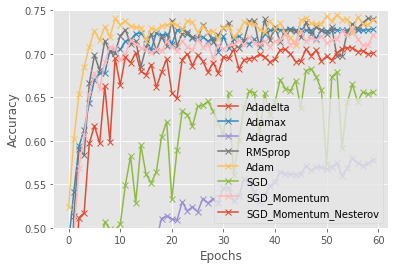

In [ ]:
for his in history_list_optimizers:
  plt.plot(his.history["val_accuracy"], marker="x")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")  
plt.ylim(0.5,0.75)
plt.legend([opt._name for opt in optimizers])
plt.show()

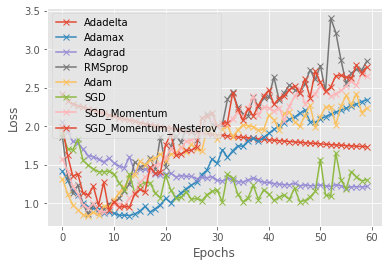

In [ ]:
for his in history_list_optimizers:
  plt.plot(his.history["val_loss"], marker="x")
plt.ylabel("Validation Loss")
plt.xlabel("Epochs")  
plt.legend([opt._name for opt in optimizers])
plt.show()

### Result:
* Adam + AdaMax
  * https://arxiv.org/pdf/1412.6980.pdf - adam paper

* RMSprop


bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser. As in seen in above (Adam) paper.

* Comparisons of adaptive optimizers with SGD
  * https://arxiv.org/abs/1705.08292 - the marginal value of adaptive gradient methods in machine learning 


### Interesting:
* Adam --> SGD
  * https://arxiv.org/abs/1712.07628
This paper suggests initially using Adam and then switch to SGD for training after a condition is triggered - this can help shrink the generalization gap between SGD and Adam.

## Best Performers

In [ ]:
def create_model():  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer="he_uniform", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding="same", kernel_initializer="he_uniform"))
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
lr_values = [1e-2, 1e-3, 1e-4, 1e-5]

In [ ]:
from tqdm import tqdm

In [ ]:
#@title adam

train_list_adam_lr = []
test_list_adam_lr = []

history_adam_lr = []

# Learning rate
for lr in tqdm(lr_values):

  model = create_model()

  opt = Adam(lr)

  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, verbose=0, batch_size=256)

  history_adam_lr.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_adam_lr.append(train_acc)
  test_list_adam_lr.append(test_acc)

100%|██████████| 4/4 [08:01<00:00, 120.42s/it]


In [ ]:
#@title sgd

train_list_sgd_mom_lr = []
test_list_sgd_mom_lr = []

history_sgd_mom_lr = []

# Learning rate
for lr in tqdm(lr_values):

  model = create_model()

  opt = SGD(lr, momentum=0.9)

  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, verbose=0, batch_size=256)

  history_sgd_mom_lr.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_sgd_mom_lr.append(train_acc)
  test_list_sgd_mom_lr.append(test_acc)

100%|██████████| 4/4 [07:44<00:00, 116.17s/it]


In [ ]:
#@title rmsprop - no momentum

train_list_rms_lr = []
test_list_rms_lr = []

history_rms_lr = []

# Learning rate
for lr in tqdm(lr_values):

  model = create_model()

  opt = RMSprop(lr)

  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, verbose=0, batch_size=256)

  history_rms_lr.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_rms_lr.append(train_acc)
  test_list_rms_lr.append(test_acc)

100%|██████████| 4/4 [07:58<00:00, 119.73s/it]


In [ ]:
#@title adaMaxax

train_list_adaMax_lr = []
test_list_adaMax_lr = []

history_adaMax_lr = []

# Learning rate
for lr in tqdm(lr_values):

  model = create_model()

  opt = Adamax(lr)

  model.compile(
      optimizer=opt,
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=60, validation_split=0.20, verbose=0, batch_size=256)

  history_adaMax_lr.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_adaMax_lr.append(train_acc)
  test_list_adaMax_lr.append(test_acc)

100%|██████████| 4/4 [07:50<00:00, 117.58s/it]


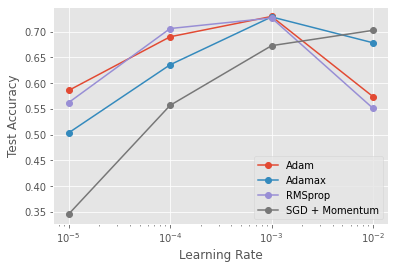

In [ ]:
plt.semilogx(lr_values, test_list_adam_lr, label='Adam', marker='o')
plt.semilogx(lr_values, test_list_adaMax_lr, label='Adamax', marker='o')
plt.semilogx(lr_values, test_list_rms_lr, label='RMSprop', marker='o')
plt.semilogx(lr_values, test_list_sgd_mom_lr, label='SGD + Momentum', marker='o')
plt.xlabel("Learning Rate")
plt.ylabel("Test Accuracy")
plt.legend()
plt.show()

# Activation Functions

* So far models have only used relu. Using tanh would allow us to test differnt weight initializers and batchnorm orderings too.

* Thus for this test we copy the same layout as the batchnormalization setups.

## No Batch Norm

In [ ]:
def create_model(activation):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(activation)
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(activation)
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(activation)
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

activation_layers = [LeakyReLU(), Activation("relu"), Activation("tanh"), Activation("sigmoid")]

In [ ]:
history_list_no_batchnorm = []

train_list_no_bn = []
test_list_no_bn = []

for act in activation_layers:

  model = create_model(act)

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=50, validation_split=0.20, batch_size=256, verbose=0)

  history_list.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_no_bn.append(train_acc)
  test_list_no_bn.append(test_acc)

## Before activation - Batchnorm

In [ ]:
def create_model(activation):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(BatchNormalization()) # BEFORE activation.
  model.add(activation)
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(BatchNormalization()) # BEFORE activation.
  model.add(activation)
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(BatchNormalization()) # BEFORE activation.
  model.add(activation)
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
history_list_bn_before = []

train_list_bn_before = []
test_list_bn_before = []

for act in activation_layers:

  model = create_model(act)

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=50, validation_split=0.20, batch_size=256)

  history_list.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_bn_before.append(train_acc)
  test_list_bn_before.append(test_acc)

Epoch 1/50
157/157 [==============================] - 3s 18ms/step - loss: 2.0858 - accuracy: 0.3723 - val_loss: 1.4434 - val_accuracy: 0.4854
Epoch 2/50
157/157 [==============================] - 3s 17ms/step - loss: 1.0825 - accuracy: 0.6254 - val_loss: 1.2961 - val_accuracy: 0.5573
Epoch 3/50
157/157 [==============================] - 3s 17ms/step - loss: 0.8860 - accuracy: 0.6954 - val_loss: 0.9831 - val_accuracy: 0.6664
Epoch 4/50
157/157 [==============================] - 3s 17ms/step - loss: 0.7494 - accuracy: 0.7396 - val_loss: 0.9677 - val_accuracy: 0.6766
Epoch 5/50
157/157 [==============================] - 3s 17ms/step - loss: 0.6614 - accuracy: 0.7699 - val_loss: 1.0174 - val_accuracy: 0.6808
Epoch 6/50
157/157 [==============================] - 3s 17ms/step - loss: 0.5574 - accuracy: 0.8085 - val_loss: 0.7972 - val_accuracy: 0.7341
Epoch 7/50
157/157 [==============================] - 3s 17ms/step - loss: 0.4824 - accuracy: 0.8330 - val_loss: 0.9176 - val_accuracy: 0.7100

## After activation - Batchnorm

In [ ]:
def create_model(activation):  

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(activation)
  model.add(BatchNormalization()) # AFTER activation.
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(activation)
  model.add(BatchNormalization()) # AFTER activation.
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), kernel_initializer="he_uniform", padding="same"))
  model.add(activation)
  model.add(BatchNormalization()) # AFTER activation.
  model.add(layers.MaxPooling2D((2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
from keras.layers.advanced_activations import LeakyReLU

In [ ]:
activation_layers = [LeakyReLU(), Activation("relu"), Activation("tanh"), Activation("sigmoid")]

In [ ]:
history_list = []

train_list_bn = []
test_list_bn = []

for act in activation_layers:

  model = create_model(act)

  model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy']
      )

  history = model.fit(X_train, y_train, epochs=50, validation_split=0.20, batch_size=256)

  history_list.append(history)

  _, train_acc = model.evaluate(X_train, y_train, verbose=0)
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  
  train_list_bn.append(train_acc)
  test_list_bn.append(test_acc)

Epoch 1/50
157/157 [==============================] - 3s 19ms/step - loss: 1.9674 - accuracy: 0.3958 - val_loss: 1.4288 - val_accuracy: 0.4813
Epoch 2/50
157/157 [==============================] - 3s 17ms/step - loss: 1.0292 - accuracy: 0.6438 - val_loss: 1.1461 - val_accuracy: 0.5986
Epoch 3/50
157/157 [==============================] - 3s 17ms/step - loss: 0.8187 - accuracy: 0.7168 - val_loss: 1.3675 - val_accuracy: 0.5893
Epoch 4/50
157/157 [==============================] - 3s 17ms/step - loss: 0.6800 - accuracy: 0.7646 - val_loss: 0.9493 - val_accuracy: 0.6945
Epoch 5/50
157/157 [==============================] - 3s 17ms/step - loss: 0.5810 - accuracy: 0.7960 - val_loss: 0.8454 - val_accuracy: 0.7233
Epoch 6/50
157/157 [==============================] - 3s 17ms/step - loss: 0.4679 - accuracy: 0.8370 - val_loss: 0.8571 - val_accuracy: 0.7373
Epoch 7/50
157/157 [==============================] - 3s 17ms/step - loss: 0.3955 - accuracy: 0.8629 - val_loss: 0.8401 - val_accuracy: 0.7462

## Result

[Text(0, 0, 'LeakyReLU'),
 Text(0, 0, 'ReLU'),
 Text(0, 0, 'Tanh'),
 Text(0, 0, 'Sigmoid')]

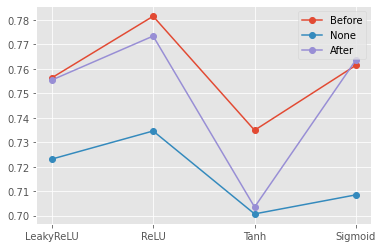

In [ ]:
x = [1,2,3,4]
x_ticks_labels = ["LeakyReLU", "ReLU", "Tanh", "Sigmoid"]

fig, ax = plt.subplots(1,1) 

ax.plot(x,test_list_bn_before, marker="o", label="Before")
ax.plot(x,test_list_no_bn, marker="o", label="None")
ax.plot(x,test_list_bn, marker="o", label="After")

ax.legend()
ax.set_xticks(x)
ax.set_xticklabels(x_ticks_labels, rotation='horizontal')

# Data Augmentation


In [309]:
def create_model():  

  initial_dropout = 0.2
  hidden_dropout_1 = 0.3
  hidden_dropout_2 = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(initial_dropout))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_1))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_2))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [310]:
from sklearn.model_selection import train_test_split

X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train, y_train, test_size=0.20, random_state=1) 

In [311]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, zoom_range=[0.7,1.3])

it_train = datagen.flow(X_train_aug, y_train_aug, batch_size=256)

In [312]:
steps = int(X_train_aug.shape[0]/256)

In [313]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=8)

In [315]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(X_val_aug,y_val_aug), callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/100
156/156 [==============================] - 20s 122ms/step - loss: 2.4088 - accuracy: 0.1785 - val_loss: 1.7439 - val_accuracy: 0.4042
Epoch 2/100
156/156 [==============================] - 19s 119ms/step - loss: 1.7851 - accuracy: 0.3688 - val_loss: 1.5012 - val_accuracy: 0.4822
Epoch 3/100
156/156 [==============================] - 20s 126ms/step - loss: 1.6383 - accuracy: 0.4293 - val_loss: 1.4244 - val_accuracy: 0.5169
Epoch 4/100
156/156 [==============================] - 19s 124ms/step - loss: 1.5238 - accuracy: 0.4736 - val_loss: 1.4599 - val_accuracy: 0.5131
Epoch 5/100
156/156 [==============================] - 19s 120ms/step - loss: 1.4179 - accuracy: 0.5146 - val_loss: 1.2471 - val_accuracy: 0.5801
Epoch 6/100
156/156 [==============================] - 19s 122ms/step - loss: 1.3395 - accuracy: 0.5507 - val_loss: 1.2232 - val_accuracy: 0.5986
Epoch 7/100
156/156 [==============================] - 19s 120ms/step - loss: 1.2679 - accuracy: 0.5744 - val_loss: 1.1524 -

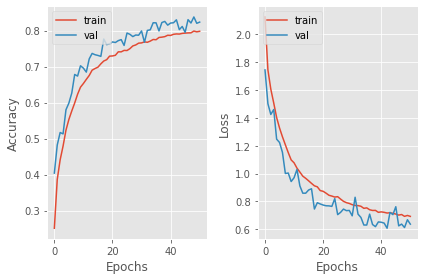

In [316]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

In [317]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6654 - accuracy: 0.8221


[0.6653597950935364, 0.8220999836921692]

# Advanced Data Augmentation


## Cutout

In [ ]:
# Load data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize.
X_train, X_test = X_train.astype("float32")/255, X_test.astype("float32")/255

# One-Hot encode.
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

In [ ]:
import random

In [ ]:
def cutout_img(img, chance, size=0):

  # If size param is passed as 0 (i.e. nothing happens) then random pick size.
  if size == 0:
    size = random.randint(10, 16)
  # Chance of cutout.
  p = random.uniform(0, 1)
  if p < chance:
    height, width, _ = img.shape

    # Randomize rectangle size.
    rect_mod = random.uniform(0,3)
    alt_rect_mod = 3 - rect_mod

    # Define cutout area.
    y = np.random.randint(height)
    x = np.random.randint(width)
    y1 = np.clip(y - size // 2, 0, height)
    y2 = np.clip(y + (size*rect_mod) // 2, 0, height) 
    x1 = np.clip(x - size // 2, 0, width)
    x2 = np.clip(x + (size*alt_rect_mod) // 2, 0, width) 
    img[y1:int(y2),x1:int(x2),:] = 0
    return img
  else:
    # Return image unchanged.
    return img
  


# To implement augmentation as tf layer:

def cutout(factor=0.5):
  return layers.Lambda(lambda x: cutout_img(x, chance=factor))


class Cutout(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return cutout_img(x, self.factor)

### Cutout Demo

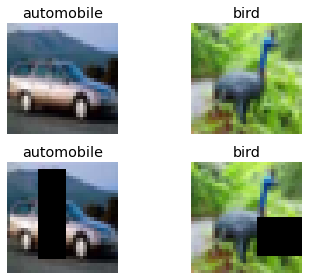

In [ ]:
fig = plt.figure()

index_1 = 4 
index_2 = 6 

img_1 = X_train[index_1]
img_2 = X_train[index_2]


plt.subplot(2, 2, 1)
plt.axis("off")
plt.grid(b=None)
plt.imshow(img_1)
plt.title(get_class_demo(index_1))

plt.subplot(2, 2, 2)
plt.axis("off")
plt.grid(b=None)
plt.imshow(img_2)
plt.title(get_class_demo(index_2))



cutout_img(img_1,1, size=0)
plt.subplot(2, 2, 3)
plt.axis("off")
plt.grid(b=None)
plt.imshow(img_1)
plt.title(get_class_demo(index_1))

cutout_img(img_2,1, size=0)
plt.subplot(2, 2, 4)
plt.axis("off")
plt.grid(b=None)
plt.imshow(img_2)
plt.title(get_class_demo(index_2))

fig.tight_layout()
plt.show()

### Cutout Test

In [ ]:
def create_model():  

  initial_dropout = 0.2
  hidden_dropout_1 = 0.3
  hidden_dropout_2 = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(initial_dropout))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_1))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_2))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=8)

In [ ]:
# Split data.
from sklearn.model_selection import train_test_split

X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train, y_train, test_size=0.20, random_state=1) 

In [ ]:
# Apply cutout.
for item in X_train_aug:
  item = cutout_img(item,0.5)

In [ ]:
from keras.regularizers import L2

model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train_aug, y_train_aug, epochs=100, validation_data=(X_val_aug,y_val_aug), batch_size=256, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/100
157/157 [==============================] - 3s 13ms/step - loss: 2.2933 - accuracy: 0.1918 - val_loss: 1.6969 - val_accuracy: 0.4140
Epoch 2/100
157/157 [==============================] - 2s 11ms/step - loss: 1.7147 - accuracy: 0.3990 - val_loss: 1.4061 - val_accuracy: 0.5267
Epoch 3/100
157/157 [==============================] - 2s 11ms/step - loss: 1.4895 - accuracy: 0.4850 - val_loss: 1.2586 - val_accuracy: 0.5804
Epoch 4/100
157/157 [==============================] - 2s 11ms/step - loss: 1.3477 - accuracy: 0.5478 - val_loss: 1.1566 - val_accuracy: 0.6216
Epoch 5/100
157/157 [==============================] - 2s 11ms/step - loss: 1.2344 - accuracy: 0.5856 - val_loss: 1.0503 - val_accuracy: 0.6617
Epoch 6/100
157/157 [==============================] - 2s 11ms/step - loss: 1.1407 - accuracy: 0.6228 - val_loss: 1.0168 - val_accuracy: 0.6684
Epoch 7/100
157/157 [==============================] - 2s 11ms/step - loss: 1.1100 - accuracy: 0.6341 - val_loss: 0.9278 - val_accuracy:

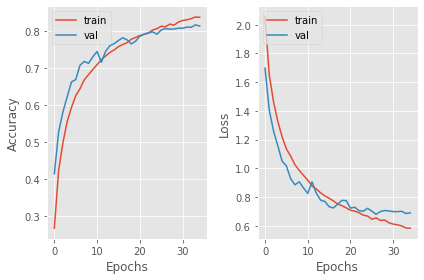

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

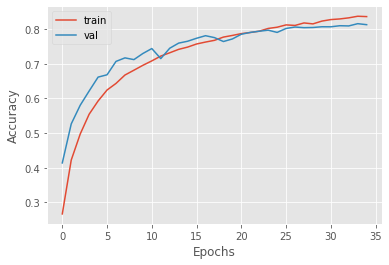

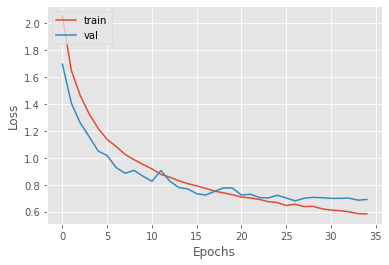

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6971 - accuracy: 0.8125


[0.6970558762550354, 0.8125]

## Mixup

* Small weight decay works best - 10^-4.
  * https://arxiv.org/pdf/1710.09412.pdf

* Future studies could explore values for alpha = beta and see what happens training only on averages of pairs for example.

In [ ]:
# Load data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize.
X_train, X_test = X_train.astype("float32")/255, X_test.astype("float32")/255

# One-Hot encode.
y_train, y_test = to_categorical(y_train), to_categorical(y_test)


# Split data.
from sklearn.model_selection import train_test_split
X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train, y_train, test_size=0.20, random_state=42) 

### Function

In [ ]:
def mixup(index_1,index_2):

  img_1 = X_train[index_1]
  img_2 = X_train[index_2]

  label_1 = y_train[index_1]
  label_2 = y_train[index_2]

  t = np.random.beta(0.4,0.4) # a = b = 0.4 as per paper.

  img_mix = t * img_1 + (1-t) * img_2
  label_mix = t * label_1 + (1-t) * label_2

  return img_mix, label_mix

### Mixup Demo

In [ ]:
def get_class_demo_label(label):

  classes = label.nonzero()[0]

  if len(classes) == 1:
    return labels[classes[0]]
  else:

    p1 = round(label[classes[0]] * 100, 1)
    p2 = round(label[classes[1]] * 100, 1)

    return "{}:{}%   {}:{}%".format(labels[classes[0]], p1, labels[classes[1]], p2)

In [ ]:
index_1, index_2 = random.randint(0,40000), random.randint(0,40000)

img, label = mixup(index_1, index_2)

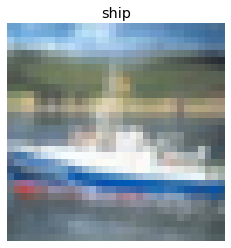

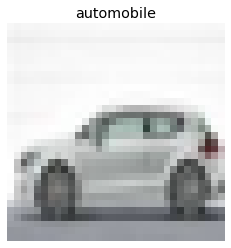

Text(0.5, 1.0, 'automobile:65.8%   ship:34.2%')

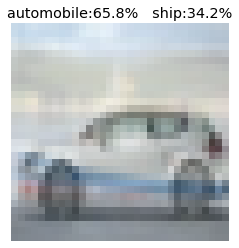

In [ ]:
plt.axis('off')
plt.grid(b=None)
plt.imshow(X_train[index_1])
plt.title(get_class_demo(index_1))
plt.show()
plt.axis('off')
plt.grid(b=None)
plt.imshow(X_train[index_2])
plt.title(get_class_demo(index_2))
plt.show()
plt.axis('off')
plt.grid(b=None)
plt.imshow(img)
plt.title(get_class_demo_label(label))

### Mixup Test

In [279]:
from sklearn.utils.random import sample_without_replacement
from sklearn.utils import shuffle

total = len(X_train_aug)
p = 0.5

# Get unique numbers. p = 0.5 will return 20000 indicies, i.e. will be able to mixup 20000 images to create 1/2 that amount new images (10000).
pairs = sample_without_replacement(total, int(total*p))

# Chunker
def chunks(arr, n):
    for i in range(0, len(arr), n): 
        yield arr[i:i + n]

# Get list of pairs.
chunked_pairs = list(chunks(pairs,2))

In [288]:
temp_x_train_aug = list(X_train_aug)
temp_y_train_aug = list(y_train_aug)

for pair in chunked_pairs:
  i = pair[0]
  j = pair[1]
  new_img, new_label = mixup(i, j)
  # Append new image, new label to training set.
  temp_x_train_aug.append(new_img)
  temp_y_train_aug.append(new_label)

# Revert to numpy.ndarray
X_train_aug = np.array(temp_x_train_aug)
y_train_aug = np.array(temp_y_train_aug)

# Shuffle.
X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

In [299]:
def create_model():  

  initial_dropout = 0.2
  hidden_dropout_1 = 0.3
  hidden_dropout_2 = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(initial_dropout))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_1))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_2))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

In [300]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(X_train_aug, y_train_aug, epochs=100, validation_data=(X_val_aug,y_val_aug), batch_size=256, callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/100
196/196 [==============================] - 3s 13ms/step - loss: 2.4243 - accuracy: 0.2005 - val_loss: 1.6083 - val_accuracy: 0.4416
Epoch 2/100
196/196 [==============================] - 2s 11ms/step - loss: 1.6613 - accuracy: 0.4325 - val_loss: 1.3364 - val_accuracy: 0.5517
Epoch 3/100
196/196 [==============================] - 2s 11ms/step - loss: 1.4396 - accuracy: 0.5253 - val_loss: 1.1874 - val_accuracy: 0.6169
Epoch 4/100
196/196 [==============================] - 2s 11ms/step - loss: 1.3115 - accuracy: 0.5822 - val_loss: 1.0698 - val_accuracy: 0.6570
Epoch 5/100
196/196 [==============================] - 2s 11ms/step - loss: 1.2090 - accuracy: 0.6219 - val_loss: 0.9936 - val_accuracy: 0.6784
Epoch 6/100
196/196 [==============================] - 2s 11ms/step - loss: 1.1159 - accuracy: 0.6578 - val_loss: 0.9053 - val_accuracy: 0.7153
Epoch 7/100
196/196 [==============================] - 2s 11ms/step - loss: 1.0472 - accuracy: 0.6886 - val_loss: 0.8795 - val_accuracy:

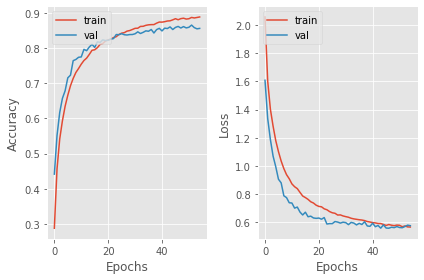

In [301]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

In [302]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6301 - accuracy: 0.8375


[0.6300711035728455, 0.8374999761581421]

# All Data Augmentation


## Data

In [318]:
import random

# Load data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize.
X_train, X_test = X_train.astype("float32")/255, X_test.astype("float32")/255

# One-Hot encode.
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

## Function Defs

In [319]:
def mixup(index_1,index_2):
  # Get images at indicies.
  img_1 = X_train[index_1]
  img_2 = X_train[index_2]

  # Get labels at indicies.
  label_1 = y_train[index_1]
  label_2 = y_train[index_2]

  # Sample from beta dist.
  t = np.random.beta(0.4,0.4) # a = b = 0.4 as per paper.

  # Interpolate.
  img_mix = t * img_1 + (1-t) * img_2
  label_mix = t * label_1 + (1-t) * label_2

  # Return new image and new label.
  return img_mix, label_mix




def cutout_img(img, chance, size=0):

  # If size param is passed as 0 (i.e. nothing happens) then random pick size.
  if size == 0:
    size = random.randint(10, 16)
  # Chance of cutout.
  p = random.uniform(0, 1)
  if p < chance:
    height, width, _ = img.shape

    # Randomize rectangle size.
    rect_mod = random.uniform(0,3)
    alt_rect_mod = 3 - rect_mod

    # Define cutout area.
    y = np.random.randint(height)
    x = np.random.randint(width)
    y1 = np.clip(y - size // 2, 0, height)
    y2 = np.clip(y + (size*rect_mod) // 2, 0, height) 
    x1 = np.clip(x - size // 2, 0, width)
    x2 = np.clip(x + (size*alt_rect_mod) // 2, 0, width) 
    img[y1:int(y2),x1:int(x2),:] = 0
    return img
  else:
    # Return image unchanged.
    return img
  


# To implement augmentation as tf layer:

def cutout(factor=0.5):
  return layers.Lambda(lambda x: cutout_img(x, chance=factor))


class Cutout(layers.Layer):
  def __init__(self, factor=0.5, **kwargs):
    super().__init__(**kwargs)
    self.factor = factor

  def call(self, x):
    return cutout_img(x, self.factor)

## Split and apply augmentation.

In [320]:
from sklearn.model_selection import train_test_split

X_train_aug, X_val_aug, y_train_aug, y_val_aug = train_test_split(X_train, y_train, test_size=0.20, random_state=1) 

In [321]:
# Apply Mixup

from sklearn.utils.random import sample_without_replacement
from sklearn.utils import shuffle

total = len(X_train_aug)
p = 0.5

# Get unique numbers. p = 0.5 will return 20000 indicies, i.e. will be able to mixup 20000 images to create 1/2 that amount new images (10000).
pairs = sample_without_replacement(total, int(total*p))

# Chunker
def chunks(arr, n):
    for i in range(0, len(arr), n): 
        yield arr[i:i + n]

# Get list of pairs.
chunked_pairs = list(chunks(pairs,2))

# Temporary lists to store image data.
temp_x_train_aug = list(X_train_aug)
temp_y_train_aug = list(y_train_aug)

for pair in chunked_pairs:
  i = pair[0]
  j = pair[1]
  new_img, new_label = mixup(i, j)
  # Append new image, new label to training set.
  temp_x_train_aug.append(new_img)
  temp_y_train_aug.append(new_label)

# Revert to numpy.ndarray
X_train_aug = np.array(temp_x_train_aug)
y_train_aug = np.array(temp_y_train_aug)

# Shuffle.
X_train_aug, y_train_aug = shuffle(X_train_aug, y_train_aug)

In [322]:
# Apply Cutout.
for item in X_train_aug:
  item = cutout_img(item,0.5)

In [323]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, zoom_range=[0.7,1.3])

it_train = datagen.flow(X_train_aug, y_train_aug, batch_size=256)

In [324]:
steps = int(X_train_aug.shape[0]/256)

## Define model

In [325]:
def create_model():  

  initial_dropout = 0.2
  hidden_dropout_1 = 0.3
  hidden_dropout_2 = 0.5

  model = models.Sequential()
  model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same", input_shape=(32, 32, 3)))
  model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(initial_dropout))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_1))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=L2(1e-4), kernel_initializer="he_uniform", padding="same"))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(hidden_dropout_2))

  model.add(layers.Flatten())
  model.add(layers.Dense(10, "softmax"))
  
  return model

## Run test

In [326]:
callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss", verbose=1, patience=8)

In [327]:
model = create_model()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )

history = model.fit(it_train, steps_per_epoch=steps, epochs=100, validation_data=(X_val_aug,y_val_aug), callbacks=[callback])

y_pred = model.predict(X_test)

Epoch 1/100
195/195 [==============================] - 24s 120ms/step - loss: 2.3146 - accuracy: 0.1741 - val_loss: 1.7120 - val_accuracy: 0.4145
Epoch 2/100
195/195 [==============================] - 23s 119ms/step - loss: 1.8287 - accuracy: 0.3639 - val_loss: 1.5530 - val_accuracy: 0.4597
Epoch 3/100
195/195 [==============================] - 23s 118ms/step - loss: 1.7027 - accuracy: 0.4116 - val_loss: 1.3788 - val_accuracy: 0.5265
Epoch 4/100
195/195 [==============================] - 23s 118ms/step - loss: 1.5903 - accuracy: 0.4630 - val_loss: 1.4143 - val_accuracy: 0.5253
Epoch 5/100
195/195 [==============================] - 23s 120ms/step - loss: 1.5035 - accuracy: 0.5024 - val_loss: 1.1902 - val_accuracy: 0.6048
Epoch 6/100
195/195 [==============================] - 23s 120ms/step - loss: 1.4095 - accuracy: 0.5374 - val_loss: 1.0982 - val_accuracy: 0.6334
Epoch 7/100
195/195 [==============================] - 24s 122ms/step - loss: 1.3333 - accuracy: 0.5701 - val_loss: 0.9821 -

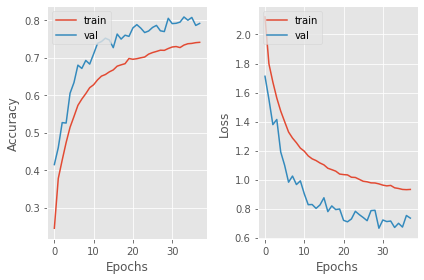

In [328]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.plot(history.history["accuracy"])
ax1.plot(history.history["val_accuracy"])
ax1.set_ylabel("Accuracy")
ax1.set_xlabel("Epochs")
ax1.legend(['train', 'val'], loc='upper left')


ax2.plot(history.history["loss"])
ax2.plot(history.history["val_loss"])
ax2.set_ylabel("Loss")
ax2.set_xlabel("Epochs")
ax2.legend(['train', 'val'], loc='upper left')
f.tight_layout()

plt.show()

In [329]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7520 - accuracy: 0.7858


[0.7519672513008118, 0.7857999801635742]